In [2]:
import psycopg2
import pandas as pd
import matplotlib

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    dbname="drayos",
    user="drayos",
    password="AxZcKG5D63iQzpq",
    host="embedded-email-cluster-dev.cluster-c3k5hvhtcivp.us-east-1.rds.amazonaws.com",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

cur.execute('''
SELECT * FROM public."driverOrder"
    WHERE "arrived" IS NOT NULL
    AND "departed" IS NOT NULL
    AND "type" in ('PULLCONTAINER', 'DELIVERLOAD', 'RETURNCONTAINER', 'HOOKCONTAINER')
''')

# Fetch all rows
rows = cur.fetchall()

# Fetch column names separately
column_names = [desc[0] for desc in cur.description]

# # Close the cursor
# cur.close()

# # Close the connection
# conn.close()

# Convert rows to DataFrame with column names
df = pd.DataFrame(rows, columns=column_names)

# clone this data frame to another variable
df_copied = df.copy()

# # Display DataFrame
# df

In [3]:
# df = df_copied.copy()

In [4]:
# add one more column to df that has time different between arrived & departed column in minutes(floating) format
df['time_taken'] = (df['departed'] - df['arrived']).dt.total_seconds() / 60

# find the records that has time taken less than 1 minutes & filter those records
df = df[df['time_taken'] > 1]

# find the records that has time taken more than 24 hours & filter those records
df = df[df['time_taken'] < 1440]

In [6]:
# create a new data frame containing group this records based on time_taken, for ex. x number of records has time_taken 0-1 hour, 1-2 hours, 2-3 hours etc.
# df_grouped = df.groupby(pd.cut(df['time_taken'], bins=[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440])).size().reset_index(name='counts')
# df_grouped.to_csv('output3.csv')

/var/folders/j6/hy61cnhj2x97fj8y37ym0g9w0000gn/T/ipykernel_30061/2145858079.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(pd.cut(df['time_taken'], bins=[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440])).size().reset_index(name='counts')


In [18]:
# create a new data frame containing group this records by customerId and another column with avenrage of time_taken
df_grouped_customer = df.groupby(['customerId']).agg({'time_taken': 'mean'})

# add another column that has customerId with average time taken
df_grouped_customer['customerId'] = df_grouped_customer.index

In [66]:
df_grouped_customer.to_csv('output.csv', index=False)
# df_grouped_customer.columns

<Axes: xlabel='customerId', ylabel='time_taken'>

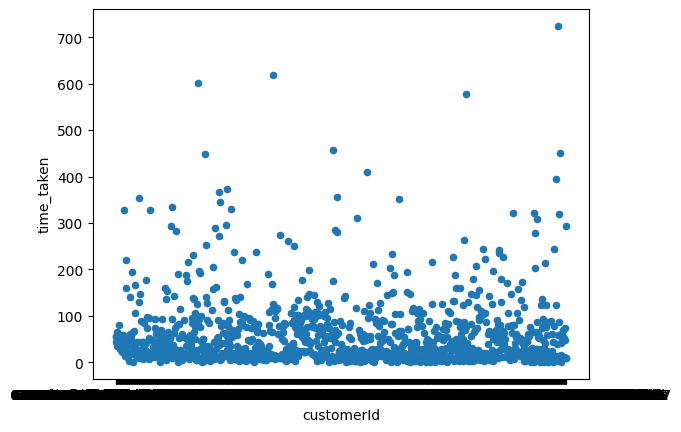

In [19]:
# scatter plot for df_grouped_customer
df_grouped_customer.plot.scatter(x='customerId', y='time_taken')